In [1]:
import pandas as pd
from itertools import combinations
import rna_seq_functions as rna
import importlib
import time
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pyensembl
import json
import plot_formatters as fmt
import os

In [2]:
labels_df = pd.read_csv('/Users/akre96/Data/HSC_aging_project/serial_transplant/rna_seq/exhaustion_labels.csv').rename(columns={'survived': 'label_name'})
labels = labels_df.label_name.unique()
label_comparisons = list(combinations(labels, 2))
label_comparisons

[('Exhausted', 'Survived')]

In [3]:
scramble_data_dir = '/Users/akre96/Data/HSC_aging_project/serial_transplant/rna_seq/scrambles'
experiment_data_dir = '/Users/akre96/Data/HSC_aging_project/serial_transplant/rna_seq/experiments/bridged'


COLOR_PALETTES = json.load(open('lib/color_palettes.json', 'r'))

In [4]:
replicates = [f.split('_')[0] for f in os.listdir(experiment_data_dir) if f.split('.')[-1] == 'csv']
replicates

['AN7', 'AN6']

In [6]:
importlib.reload(rna)
comparison_df, mapped_clones, experiment_rna_data_df = rna.generate_rna_seq_label_comparison_df(
    experiment_data_dir,
    scramble_data_dir,
    replicates,
    n_scrambles=5,
    labels_df=labels_df,
    label_comparisons=label_comparisons,
    filter_genes=False,
    filter_genes_path=None
)

Working on: AN7 experiment ...
	...Importing Data
	...Comparing: ('Exhausted', 'Survived')
Done.
Working on: AN7 scramble-0 ...
	...Importing Data
	...Comparing: ('Exhausted', 'Survived')
Done.
Working on: AN7 scramble-1 ...
	...Importing Data
	...Comparing: ('Exhausted', 'Survived')
Done.
Working on: AN7 scramble-2 ...
	...Importing Data
	...Comparing: ('Exhausted', 'Survived')
Done.
Working on: AN7 scramble-3 ...
	...Importing Data
	...Comparing: ('Exhausted', 'Survived')
Done.
Working on: AN7 scramble-4 ...
	...Importing Data
	...Comparing: ('Exhausted', 'Survived')
Done.
Working on: AN6 experiment ...
	...Importing Data
	...Comparing: ('Exhausted', 'Survived')
Done.
Working on: AN6 scramble-0 ...
	...Importing Data
	...Comparing: ('Exhausted', 'Survived')
Done.
Working on: AN6 scramble-1 ...
	...Importing Data
	...Comparing: ('Exhausted', 'Survived')
Done.
Working on: AN6 scramble-2 ...
	...Importing Data
	...Comparing: ('Exhausted', 'Survived')
Done.
Working on: AN6 scramble-3 ...

In [7]:
comparison_df.to_csv('/Users/akre96/Data/HSC_aging_project/serial_transplant/rna_seq/Exhaust_Comparison.csv', index=False)
experiment_rna_data_df.to_csv('/Users/akre96/Data/HSC_aging_project/serial_transplant/rna_seq/Exhaust_RNA_expression.csv', index=False)
mapped_clones.to_csv('/Users/akre96/Data/HSC_aging_project/serial_transplant/rna_seq/mapped_clones.csv', index=False)

In [8]:
experiment_rna_data_df = pd.read_csv('/Users/akre96/Data/HSC_aging_project/serial_transplant/rna_seq/Exhaust_RNA_expression.csv')
mapped_clones = pd.read_csv('/Users/akre96/Data/HSC_aging_project/serial_transplant/rna_seq/mapped_clones.csv')

In [9]:
no_na_comparison_df = comparison_df[~comparison_df.log2fc.isna()]
print(len(comparison_df), len(no_na_comparison_df))

no_na_comparison_df[['replicate', 'experiment_type' ,'comparison', 'count_0', 'count_1', 'l0', 'l1']].drop_duplicates().sort_values(by=['replicate', 'comparison'])

146190 146190


,replicate,experiment_type,comparison,count_0,count_1,l0,l1
0,AN6,experiment,Exhausted vs Survived,109,3307,Exhausted,Survived
0,AN6,scramble-0,Exhausted vs Survived,578,2079,Exhausted,Survived
0,AN6,scramble-1,Exhausted vs Survived,649,2079,Exhausted,Survived
0,AN6,scramble-2,Exhausted vs Survived,617,2070,Exhausted,Survived
0,AN6,scramble-3,Exhausted vs Survived,599,2123,Exhausted,Survived
0,AN6,scramble-4,Exhausted vs Survived,616,2085,Exhausted,Survived
0,AN7,experiment,Exhausted vs Survived,31,1018,Exhausted,Survived
0,AN7,scramble-0,Exhausted vs Survived,114,690,Exhausted,Survived
0,AN7,scramble-1,Exhausted vs Survived,112,717,Exhausted,Survived
0,AN7,scramble-2,Exhausted vs Survived,119,696,Exhausted,Survived


In [10]:
no_na_comparison_df[
    (no_na_comparison_df.gene_id == 'ENSMUSG00000042345') &\
    (no_na_comparison_df.experiment_type == 'experiment')
]

,gene_id,comparison,p_value_greater,p_value_less,fold_change,log2fc,count_0,count_1,mean_0,mean_1,l0,l1,replicate,experiment_type
0,ENSMUSG00000042345,Exhausted vs Survived,6.790893e-01,0.32244,0.000000,-inf,31,1018,0.00000,0.006299,Exhausted,Survived,AN7,experiment
0,ENSMUSG00000042345,Exhausted vs Survived,8.854742e-08,1.00000,7.927777,2.986916,109,3307,0.03595,0.004535,Exhausted,Survived,AN6,experiment


In [12]:
importlib.reload(rna)

isolate_replicate_cols = [
    'gene_id',
    'experiment_type',
    'comparison']

start = time.process_time()

replicate_combined_df = rna.combine_group_p_values(
    no_na_comparison_df,
    isolate_replicate_cols
)
stop = time.process_time()
print('Time Elapsed:', stop - start, 'seconds')

Time Elapsed: 67.7461679999999 seconds


In [13]:
replicate_combined_df.to_csv('/Users/akre96/Data/HSC_aging_project/serial_transplant/rna_seq/replicate_combined_Exhaust_Comparison.csv', index=False)
replicate_combined_df.head(n=6)

,gene_id,experiment_type,comparison,p_value_less,p_value_greater,fold_change,log2fc
0,ENSMUSG00000000001,experiment,Exhausted vs Survived,0.342727,0.481775,0.913949,-0.159755
1,ENSMUSG00000000001,scramble-0,Exhausted vs Survived,0.246043,0.878502,0.935175,-0.096943
2,ENSMUSG00000000001,scramble-1,Exhausted vs Survived,0.967759,0.047838,1.099336,0.136571
3,ENSMUSG00000000001,scramble-2,Exhausted vs Survived,0.726674,0.234385,1.033556,0.046666
4,ENSMUSG00000000001,scramble-3,Exhausted vs Survived,0.238413,0.845308,0.935934,-0.097144
5,ENSMUSG00000000001,scramble-4,Exhausted vs Survived,0.159789,0.923941,0.906830,-0.141320


In [14]:
importlib.reload(rna)

start = time.process_time()

experiment_with_greater_fpr_df = rna.calculate_fpr_genes_vs_comparisons(
    comparison_df=replicate_combined_df,
    isolate_gene_cols=['experiment_type', 'comparison'],
    p_value_col='p_value_greater',
    p_value_cutoff=0.1,
)
experiment_with_less_fpr_df = rna.calculate_fpr_genes_vs_comparisons(
    comparison_df=replicate_combined_df,
    isolate_gene_cols=['experiment_type', 'comparison'],
    p_value_col='p_value_less',
    p_value_cutoff=0.1,
)
experiment_with_fpr_df = experiment_with_greater_fpr_df.merge(
    experiment_with_less_fpr_df,
    how='outer',
    validate='1:1'
)
stop = time.process_time()

print('Time Elapsed:', stop - start, 'seconds')

# of P-Values: 12053
# of P-Values less than or equal to  0.1 1387


INFO:numexpr.utils:NumExpr defaulting to 8 threads.


# of P-Values: 12053
# of P-Values less than or equal to  0.1 948
Time Elapsed: 0.6454040000000987 seconds


In [15]:
ensembl = pyensembl.EnsemblRelease(species='mus musculus')
ensembl.gene_ids()[0]

'ENSMUSG00000000001'

In [16]:
gene_names = []
for gene_id in experiment_with_fpr_df.gene_id:
        try:
            gene_names.append(ensembl.gene_by_id(gene_id).gene_name)
        except ValueError:
            gene_names.append(gene_id)

experiment_with_fpr_df['gene_name'] = gene_names

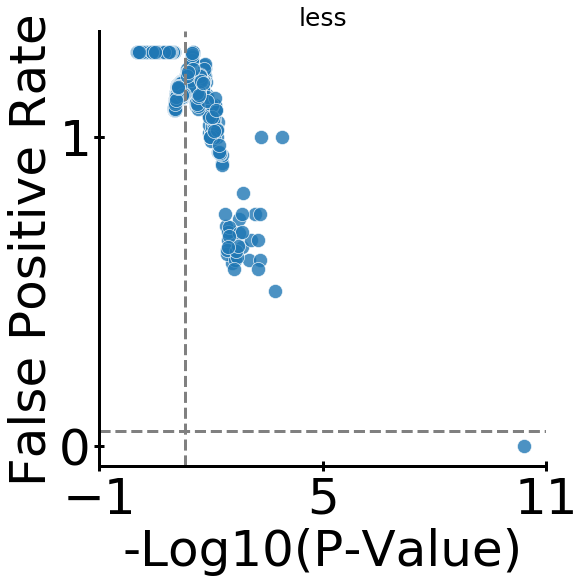

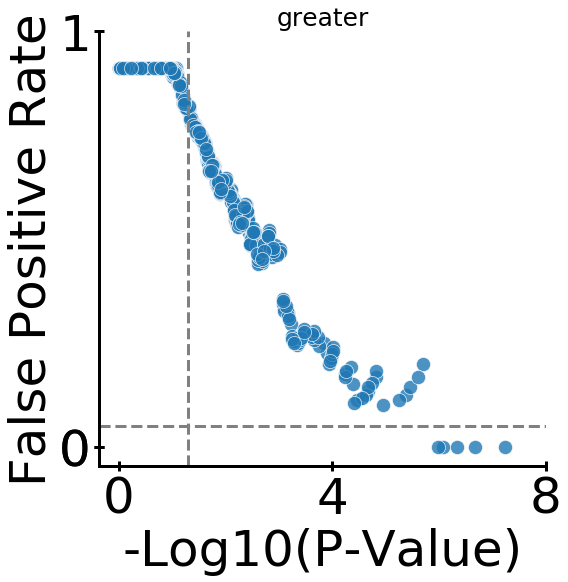

In [17]:
mpl.rcParams['font.size'] = 50
for direction in ['less', 'greater']:
    fig, ax = plt.subplots(figsize=(8, 8))
    linewidth=3
    s=200
    sns.scatterplot(
        x='nlt_p_value_'+direction,
        y='p_value_' + direction + '_fpr',
        data=experiment_with_fpr_df,
        s=s,
        alpha=0.8
    )
    ax.axhline(y=0.05, linestyle='dashed', c='gray', linewidth=linewidth)
    ax.axvline(x=-1 * np.log10(0.05), linestyle='dashed', c='gray', linewidth=linewidth)

    plt.ylabel('False Positive Rate')
    plt.xlabel('-Log10(P-Value)')
    fmt.add_grid_despine_linewidth(ax, linewidth=linewidth, grid=False)
    fmt.tick_at_end_of_axis(ax, n_ticks=3, round_tick_end=False, hide_min=False, round_ticks=True, round_base=0.1)    
    plt.title(direction, fontsize=25)


In [18]:
pass_fpr_and_p_df = experiment_with_fpr_df[
    (
        (
            (experiment_with_fpr_df.p_value_greater < 0.05) &\
            (experiment_with_fpr_df.p_value_greater_fpr < 0.05)
        ) |\
        (
            (experiment_with_fpr_df.p_value_less < 0.05) &\
            (experiment_with_fpr_df.p_value_less_fpr < 0.05)
        )
    )
]
pass_fpr_and_p_df[['comparison', 'gene_name','p_value_greater', 'p_value_less', 'log2fc', 'fold_change', 'p_value_greater_fpr', 'p_value_less_fpr']]

,comparison,gene_name,p_value_greater,p_value_less,log2fc,fold_change,p_value_greater_fpr,p_value_less_fpr
3109,Exhausted vs Survived,Tspo2,8.625680e-07,6.873901e-01,-inf,3.689192,0.000000,1.274336
4899,Exhausted vs Survived,Ermap,4.711484e-07,7.499589e-01,-inf,3.016542,0.000000,1.274336
8665,Exhausted vs Survived,Ubash3a,1.059924e-06,6.873901e-01,-inf,3.963888,0.000000,1.274336
10474,Exhausted vs Survived,Kcng2,5.781938e-08,7.499589e-01,-inf,5.121605,0.000000,1.274336
11757,Exhausted vs Survived,Xist,9.999995e-01,3.933422e-11,-0.866629,0.548716,0.912757,0.000000
12178,Exhausted vs Survived,Gm26601,2.092458e-07,9.999029e-01,2.697171,8.030199,0.000000,1.274336


In [19]:
sig_genes = pass_fpr_and_p_df[['comparison','gene_name', 'gene_id', 'fold_change']]
sig_gene_expression = experiment_rna_data_df.merge(
    sig_genes,
    how='inner',
    validate='m:m'
)

In [ ]:
mpl.rcParams['font.size'] = 25
for comp, c_df in sig_genes.groupby('comparison'):
    print('Working on:', comp)
    sig_gene_expression = experiment_rna_data_df.merge(
        c_df,
        how='inner',
        validate='m:1'
    )
    l1_l2_df = sig_gene_expression[sig_gene_expression.label_name.isin(comp.split(' '))]
    fig, ax = plt.subplots(figsize=(10,6))
    linewidth=4
    sns.swarmplot(
        y='expression',
        x='gene_name',
        hue='label_name',
        data=l1_l2_df,
        ax=ax,
        palette=COLOR_PALETTES['survived'],
        hue_order=['Exhausted', 'Survived'],
        dodge=True,
        zorder=0,
        linewidth=0.5

    )
    medianprops = dict(
        linewidth=0,
    )
    meanprops = dict(
        linestyle='solid',
        linewidth=3,
        color='black'
    )


    sns.boxplot(
        y='expression',
        x='gene_name',
        hue='label_name',
        hue_order=['Exhausted', 'Survived'],
        data=l1_l2_df,
        ax=ax,
        fliersize=0,
        showbox=False,
        whiskerprops={
            "alpha": 0
        },
        dodge=True,
        showcaps=False,
        showmeans=True,
        meanline=True,
        meanprops=meanprops,
        medianprops=medianprops,
    )
    ax.legend().remove()
    sns.despine()
    fmt.change_axis_linewidth(ax, linewidth)
    ax.tick_params(axis='x', rotation=25)
    ax.set_xlabel('')

Working on: Exhausted vs Survived


In [21]:
' '.join(sig_genes['gene_id'].unique().tolist())

'ENSMUSG00000023995 ENSMUSG00000028644 ENSMUSG00000042345 ENSMUSG00000059852 ENSMUSG00000086503 ENSMUSG00000097859'

In [22]:
sig_genes[['gene_id', 'gene_name']]

,gene_id,gene_name
3109,ENSMUSG00000023995,Tspo2
4899,ENSMUSG00000028644,Ermap
8665,ENSMUSG00000042345,Ubash3a
10474,ENSMUSG00000059852,Kcng2
11757,ENSMUSG00000086503,Xist
12178,ENSMUSG00000097859,Gm26601


In [ ]:
mpl.rcParams['font.size'] = 25
for comp, c_df in sig_genes.groupby('comparison'):
    print('Working on:', comp)
    sig_gene_expression = experiment_rna_data_df.merge(
        c_df,
        how='inner',
        validate='m:1'
    )
    l1_l2_df = sig_gene_expression[sig_gene_expression.label_name.isin(comp.split(' '))]
    for rep, r_df in l1_l2_df.groupby('replicate'):
        fig, ax = plt.subplots(figsize=(15,8))
        linewidth=4
        sns.swarmplot(
            y='expression',
            x='gene_name',
            hue='label_name',
            data=r_df,
            ax=ax,
            palette=COLOR_PALETTES['survived'],
            hue_order=['Exhausted', 'Survived'],
            dodge=True,
            linewidth=0.5

        )
        medianprops = dict(
            linewidth=0,
        )
        meanprops = dict(
            linestyle='solid',
            linewidth=3,
            color='black'
        )


        sns.boxplot(
            y='expression',
            x='gene_name',
            hue='label_name',
            hue_order=['Exhausted', 'Survived'],
            data=r_df,
            ax=ax,
            fliersize=0,
            showbox=False,
            whiskerprops={
                "alpha": 0
            },
            dodge=True,
            showcaps=False,
            showmeans=True,
            meanline=True,
            meanprops=meanprops,
            medianprops=medianprops,
        )
        ax.legend().remove()
        ax.set_title(rep)
        sns.despine()
        fmt.change_axis_linewidth(ax, linewidth)
        ax.tick_params(axis='x', rotation=25)
        ax.set_xlabel('')